|--- StudyHours <= 0.50
|   |--- class: 1
|--- StudyHours >  0.50
|   |--- class: 0



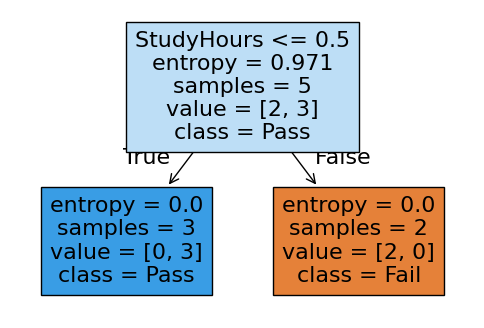

In [1]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Dataset
data = {
    'StudyHours': ['Low', 'High', 'High', 'Low', 'High'],
    'Attendance': ['Poor', 'Good', 'Poor', 'Good', 'Good'],
    'Result': ['Fail', 'Pass', 'Pass', 'Fail', 'Pass']
}
df = pd.DataFrame(data)
df

# Encode
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df[['StudyHours', 'Attendance']]
y = df['Result']

# Model (ID3 = entropy)
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# Text Rules
rules = export_text(model, feature_names=['StudyHours', 'Attendance'])
print(rules)

# Plot Tree
plt.figure(figsize=(6, 4))
plot_tree(model, feature_names=['StudyHours', 'Attendance'],
          class_names=['Fail', 'Pass'], filled=True)
plt.show()
